# Import the Required Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load the Dataset

In [2]:
pd.set_option('display.max_columns', 100)
encode_latin = 'latin'
df = pd.read_csv("D:/DataSets/bank.csv", low_memory = False, encoding = encode_latin)
df.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


# Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
pd.set_option("display.float_format", "{:.2f}".format)
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.00,11162.00,11162.00,11162.00,11162.00,11162.00,11162.00
mean,41.23,1528.54,15.66,371.99,2.51,51.33,0.83
std,11.91,3225.41,8.42,347.13,2.72,108.76,2.29
min,18.00,-6847.00,1.00,2.00,1.00,-1.00,0.00
25%,32.00,122.00,8.00,138.00,1.00,-1.00,0.00
50%,39.00,550.00,15.00,255.00,2.00,-1.00,0.00
75%,49.00,1708.00,22.00,496.00,3.00,20.75,1.00
max,95.00,81204.00,31.00,3881.00,63.00,854.00,58.00


In [5]:
df.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
deposit      False
dtype: bool

In [6]:
df.drop(['contact'], axis="columns", inplace=True)

In [7]:
df.head(20)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,6,may,1297,3,-1,0,unknown,yes


In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'deposit'],
      dtype='object')

In [9]:
print('jobs : {}'.format(df.job.unique()))
print("====================================")
print('marital : {}'.format(df.marital.unique()))
print("====================================")
print('education : {}'.format(df.education.unique()))
print("====================================")
print('default : {}'.format(df.default.unique()))
print("====================================")
print('housing : {}'.format(df.housing.unique()))
print("====================================")
print('loan : {}'.format(df.loan.unique()))
print("====================================")
print('month : {}'.format(df.month.unique()))
print("====================================")
print('deposit : {}'.format(df.deposit.unique()))

jobs : ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital : ['married' 'single' 'divorced']
education : ['secondary' 'tertiary' 'primary' 'unknown']
default : ['no' 'yes']
housing : ['yes' 'no']
loan : ['no' 'yes']
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
deposit : ['yes' 'no']


# Data Visualization

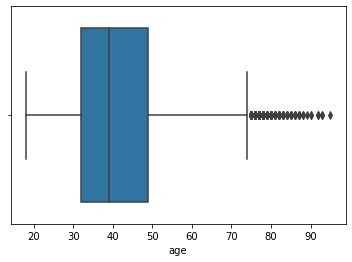

In [10]:
# Boxplot for 'age'
g = sns.boxplot(x=df["age"])

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

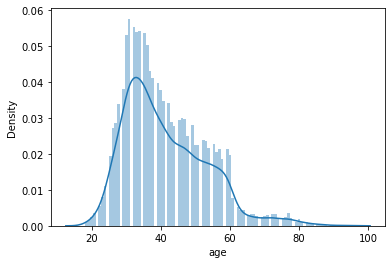

In [11]:
# Distribution of Age
sns.distplot(df.age, bins=100)

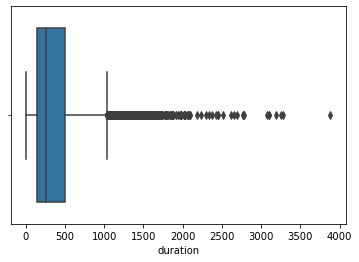

In [12]:
# Boxplot for 'duration'
g = sns.boxplot(x=df["duration"])

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

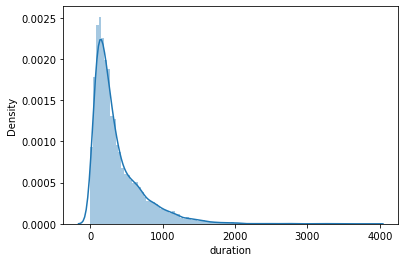

In [13]:
sns.distplot(df.duration, bins=100)

## Convert categorical data

In [14]:
# Make a copy for parsing
bank_data = df.copy()

In [15]:
bank_data.job.unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [16]:
# Explore People who made a deposit Vs Job category
jobs = ['admin.', 'technician', 'services', 'management', 'retired','blue-collar', 'unemployed', 'entrepreneur', 'housemaid','unknown', 'self-employed', 'student']
for j in jobs:
    print("{:15} : {:5}". format(j, len(bank_data[(bank_data.deposit == "yes") & (bank_data.job ==j)])))

admin.          :   631
technician      :   840
services        :   369
management      :  1301
retired         :   516
blue-collar     :   708
unemployed      :   202
entrepreneur    :   123
housemaid       :   109
unknown         :    34
self-employed   :   187
student         :   269


In [17]:
# Different types of job categories and their counts
bank_data.job.value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [18]:
# Combine similar jobs into categiroes
bank_data['job'] = bank_data['job'].replace(['management', 'admin.'], 'white-collar')
bank_data['job'] = bank_data['job'].replace(['services','housemaid'], 'pink-collar')
bank_data['job'] = bank_data['job'].replace(['retired', 'student', 'unemployed', 'unknown'], 'other')

In [19]:
# New value counts
bank_data.job.value_counts()

white-collar     3900
blue-collar      1944
technician       1823
other            1565
pink-collar      1197
self-employed     405
entrepreneur      328
Name: job, dtype: int64

In [21]:
# Combine 'unknown' and 'other' as 'other' isn't really match with either 'success' or 'failure'
bank_data['poutcome'] = bank_data['poutcome'].replace(['other'] , 'unknown')
bank_data.poutcome.value_counts()

unknown    8863
failure    1228
success    1071
Name: poutcome, dtype: int64

In [22]:
# values for "default" : yes/no
bank_data["default"]
bank_data['default_cat'] = bank_data['default'].map( {'yes':1, 'no':0} )
bank_data.drop('default', axis=1,inplace = True)
bank_data.default_cat.value_counts()

0    10994
1      168
Name: default_cat, dtype: int64

In [23]:
# values for "housing" : yes/no
bank_data["housing_cat"]=bank_data['housing'].map({'yes':1, 'no':0})
bank_data.drop('housing', axis=1,inplace = True)
bank_data.housing_cat.value_counts()

0    5881
1    5281
Name: housing_cat, dtype: int64

In [24]:
# values for "loan" : yes/no
bank_data["loan_cat"] = bank_data['loan'].map({'yes':1, 'no':0})
bank_data.drop('loan', axis=1, inplace=True)
bank_data.loan_cat.value_counts()

0    9702
1    1460
Name: loan_cat, dtype: int64

In [25]:
bank_data.head()

,age,job,marital,education,balance,day,month,duration,campaign,pdays,previous,poutcome,deposit,default_cat,housing_cat,loan_cat
0,59,white-collar,married,secondary,2343,5,may,1042,1,-1,0,unknown,yes,0,1,0
1,56,white-collar,married,secondary,45,5,may,1467,1,-1,0,unknown,yes,0,0,0
2,41,technician,married,secondary,1270,5,may,1389,1,-1,0,unknown,yes,0,1,0
3,55,pink-collar,married,secondary,2476,5,may,579,1,-1,0,unknown,yes,0,1,0
4,54,white-collar,married,tertiary,184,5,may,673,2,-1,0,unknown,yes,0,0,0


In [26]:
# day  : last contact day of the month
# month: last contact month of year
# Drop 'month' and 'day' as they don't have any intrinsic meaning
bank_data.drop('month', axis=1, inplace=True)
bank_data.drop('day', axis=1, inplace=True)

In [27]:
# values for "deposit" : yes/no
bank_data["deposit_cat"] = bank_data['deposit'].map({'yes':1, 'no':0})
bank_data.drop('deposit', axis=1, inplace=True)
bank_data.deposit_cat.value_counts()

0    5873
1    5289
Name: deposit_cat, dtype: int64

In [28]:
# pdays: number of days that passed by after the client was last contacted from a previous campaign
# -1 means client was not previously contacted

print("Customers that have not been contacted before:", len(bank_data[bank_data.pdays==-1]))
print("Maximum values on padys    :", bank_data['pdays'].max())

Customers that have not been contacted before: 8324
Maximum values on padys    : 854


In [29]:
# Map padys=-1 into a large value (10000 is used) to indicate that it is so far in the past that it has no effect
bank_data.loc[bank_data['pdays'] == -1, 'pdays'] = 10000

In [30]:
# Create a new column: recent_pdays 
bank_data['recent_pdays'] = np.where(bank_data['pdays'], 1/bank_data.pdays, 1/bank_data.pdays)

# Drop 'pdays'
bank_data.drop('pdays', axis=1, inplace = True)

In [31]:
bank_data.head()

,age,job,marital,education,balance,duration,campaign,previous,poutcome,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays
0,59,white-collar,married,secondary,2343,1042,1,0,unknown,0,1,0,1,0.00
1,56,white-collar,married,secondary,45,1467,1,0,unknown,0,0,0,1,0.00
2,41,technician,married,secondary,1270,1389,1,0,unknown,0,1,0,1,0.00
3,55,pink-collar,married,secondary,2476,579,1,0,unknown,0,1,0,1,0.00
4,54,white-collar,married,tertiary,184,673,2,0,unknown,0,0,0,1,0.00


In [32]:
# Convert categorical variables to dummies
bank_with_dummies = pd.get_dummies(data=bank_data, columns = ['job', 'marital', 'education', 'poutcome'], prefix = ['job', 'marital', 'education', 'poutcome'])
bank_with_dummies.head()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,job_blue-collar,job_entrepreneur,job_other,job_pink-collar,job_self-employed,job_technician,job_white-collar,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
0,59,2343,1042,1,0,0,1,0,1,0.00,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
1,56,45,1467,1,0,0,0,0,1,0.00,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
2,41,1270,1389,1,0,0,1,0,1,0.00,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1
3,55,2476,579,1,0,0,1,0,1,0.00,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
4,54,184,673,2,0,0,0,0,1,0.00,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1


In [33]:
bank_with_dummies.shape

(11162, 27)

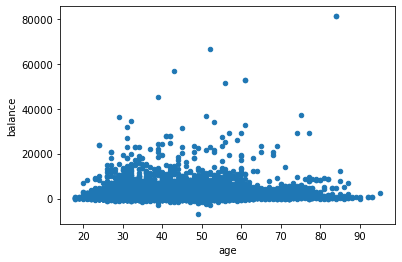

In [34]:
# Scatterplot showing age and balance
bank_with_dummies.plot(kind='scatter', x='age', y='balance');

# Across all ages, majority of people have savings of less than 20000.

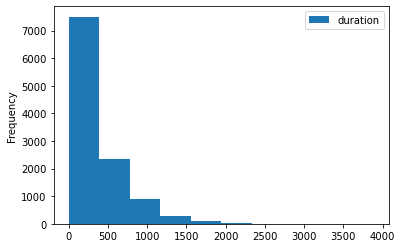

In [35]:
bank_with_dummies.plot(kind='hist', x='poutcome_success', y='duration');

In [36]:
# People who sign up to a term deposite
bank_with_dummies[bank_data.deposit_cat == 1].describe()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,job_blue-collar,job_entrepreneur,job_other,job_pink-collar,job_self-employed,job_technician,job_white-collar,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
count,5289.00,5289.00,5289.00,5289.00,5289.00,5289.00,5289.00,5289.00,5289.00,5289.00,5289.00,5289.00,5289.00,5289.00,5289.00,5289.00,5289.00,5289.00,5289.00,5289.00,5289.00,5289.00,5289.00,5289.00,5289.00,5289.00,5289.00
mean,41.67,1804.27,537.29,2.14,1.17,0.01,0.37,0.09,1.00,0.00,0.13,0.02,0.19,0.09,0.04,0.16,0.37,0.12,0.52,0.36,0.11,0.46,0.38,0.05,0.12,0.18,0.70
std,13.50,3501.10,392.53,1.92,2.55,0.10,0.48,0.29,0.00,0.04,0.34,0.15,0.39,0.29,0.18,0.37,0.48,0.32,0.50,0.48,0.32,0.50,0.48,0.21,0.32,0.39,0.46
min,18.00,-3058.00,8.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,31.00,210.00,244.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,38.00,733.00,426.00,2.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
75%,50.00,2159.00,725.00,3.00,1.00,0.00,1.00,0.00,1.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00
max,95.00,81204.00,3881.00,32.00,58.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [37]:
# People signed up to a term deposite having a personal loan (loan_cat) and housing loan (housing_cat)
len(bank_with_dummies[(bank_with_dummies.deposit_cat == 1) & (bank_with_dummies.loan_cat) & (bank_with_dummies.housing_cat)])

265

In [38]:
# People signed up to a term deposite with a credit default 
len(bank_with_dummies[(bank_with_dummies.deposit_cat == 1) & (bank_with_dummies.default_cat ==1)])

52

<AxesSubplot:xlabel='job', ylabel='deposit_cat'>

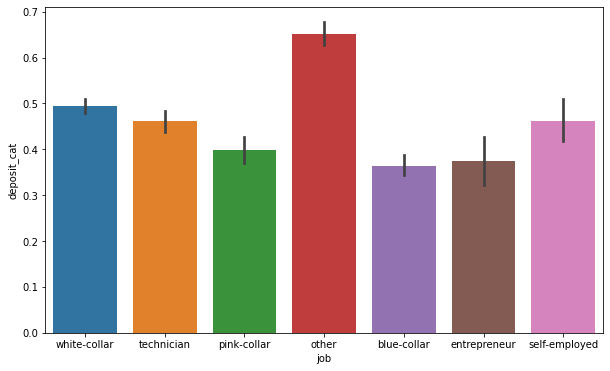

In [40]:
# Bar chart of job Vs deposite
plt.figure(figsize = (10,6))
sns.barplot(x='job', y = 'deposit_cat', data = bank_data)

<AxesSubplot:xlabel='poutcome', ylabel='duration'>

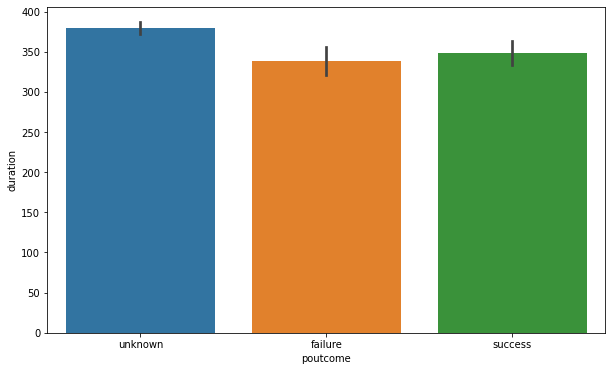

In [41]:
# Bar chart of "previous outcome" Vs "call duration"

plt.figure(figsize = (10,6))
sns.barplot(x='poutcome', y = 'duration', data = bank_data)

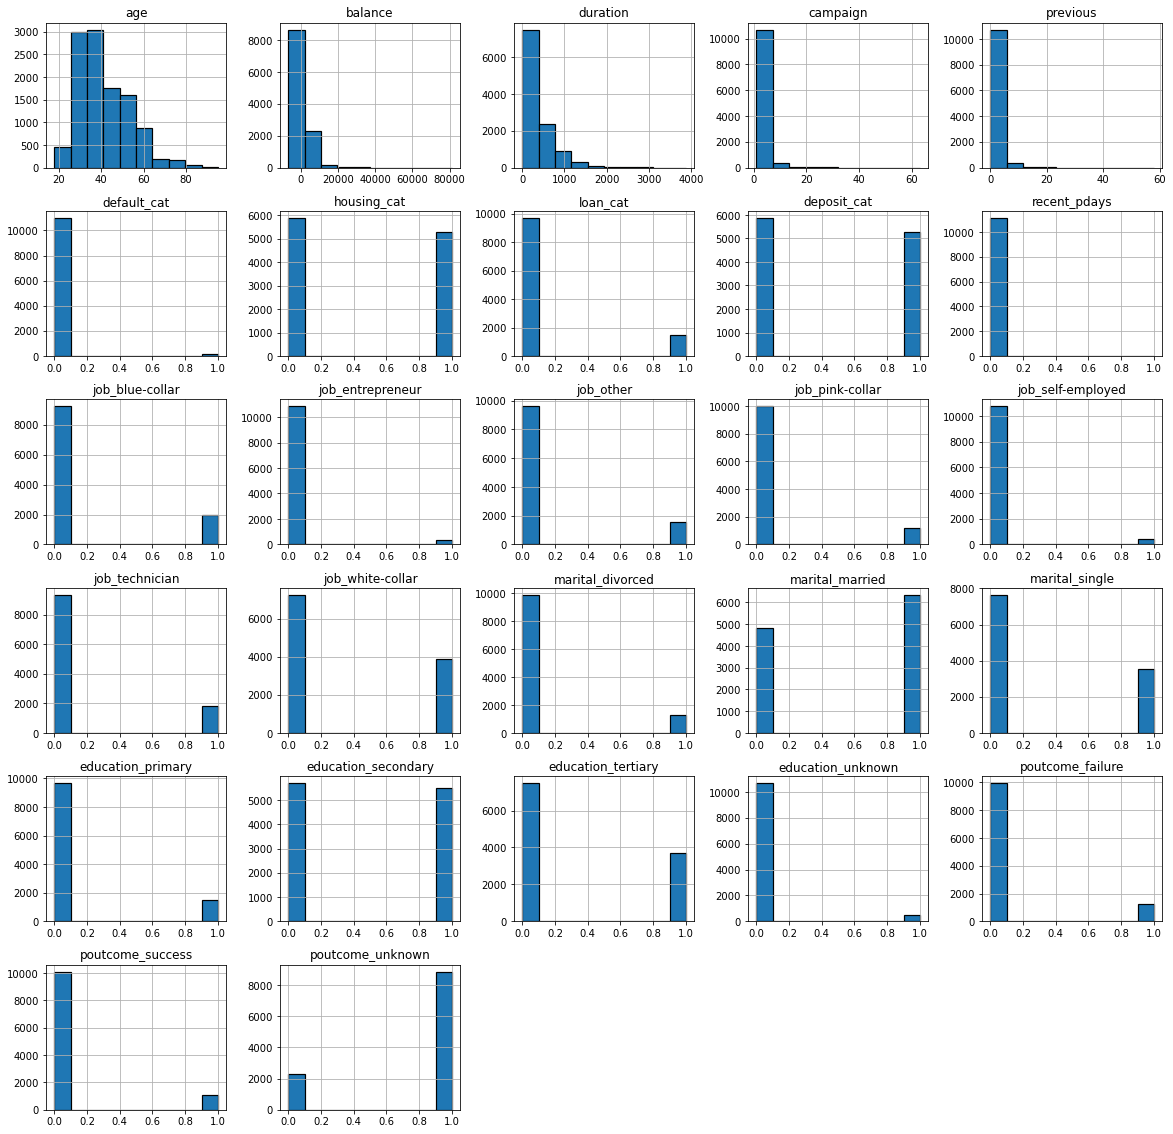

In [43]:
# Visulazing the distibution of the data for every feature
bank_with_dummies.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

In [44]:
# make a copy
bankcl = bank_with_dummies

In [45]:
# The Correltion matrix
corr = bankcl.corr()
corr

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,job_blue-collar,job_entrepreneur,job_other,job_pink-collar,job_self-employed,job_technician,job_white-collar,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
age,1.00,0.11,0.00,-0.01,0.02,-0.01,-0.17,-0.03,0.03,0.02,-0.07,0.02,0.30,-0.03,-0.02,-0.08,-0.08,0.19,0.32,-0.47,0.23,-0.09,-0.10,0.08,-0.01,0.06,-0.04
balance,0.11,1.00,0.02,-0.01,0.03,-0.06,-0.08,-0.08,0.08,-0.00,-0.05,0.01,0.05,-0.04,0.02,0.00,0.01,-0.02,0.03,-0.01,-0.00,-0.07,0.07,0.01,0.00,0.05,-0.03
duration,0.00,0.02,1.00,-0.04,-0.03,-0.01,0.04,-0.00,0.45,-0.01,0.03,-0.00,0.01,0.01,0.01,-0.01,-0.03,0.02,-0.04,0.02,0.01,0.00,-0.01,-0.02,-0.03,-0.02,0.04
campaign,-0.01,-0.01,-0.04,1.00,-0.05,0.03,0.01,0.03,-0.13,-0.03,0.01,0.01,-0.05,0.01,0.00,0.02,0.00,-0.01,0.05,-0.05,0.02,-0.01,-0.01,0.01,-0.08,-0.09,0.13
previous,0.02,0.03,-0.03,-0.05,1.00,-0.04,-0.00,-0.02,0.14,0.12,-0.04,-0.02,0.03,-0.03,-0.00,0.00,0.03,-0.03,-0.01,0.02,-0.02,-0.00,0.03,-0.01,0.34,0.33,-0.50
default_cat,-0.01,-0.06,-0.01,0.03,-0.04,1.00,0.01,0.08,-0.04,-0.01,0.02,0.02,-0.02,-0.01,0.01,0.00,-0.01,0.02,-0.01,-0.01,0.01,-0.00,-0.01,0.01,-0.02,-0.04,0.05
housing_cat,-0.17,-0.08,0.04,0.01,-0.00,0.01,1.00,0.08,-0.20,-0.03,0.19,0.01,-0.23,0.04,-0.02,0.01,-0.01,0.01,0.04,-0.04,0.02,0.12,-0.11,-0.05,0.09,-0.14,0.03
loan_cat,-0.03,-0.08,-0.00,0.03,-0.02,0.08,0.08,1.00,-0.11,-0.01,0.06,0.04,-0.10,0.01,0.00,0.01,-0.01,0.03,0.04,-0.07,0.01,0.08,-0.07,-0.05,0.01,-0.08,0.05
deposit_cat,0.03,0.08,0.45,-0.13,0.14,-0.04,-0.20,-0.11,1.00,0.03,-0.10,-0.03,0.14,-0.05,-0.00,-0.01,0.03,0.01,-0.09,0.09,-0.06,-0.05,0.09,0.01,0.02,0.29,-0.22
recent_pdays,0.02,-0.00,-0.01,-0.03,0.12,-0.01,-0.03,-0.01,0.03,1.00,-0.02,0.01,0.02,-0.00,-0.01,-0.01,0.00,-0.02,0.01,0.00,-0.01,-0.02,0.02,0.01,0.05,0.12,-0.13


<AxesSubplot:>

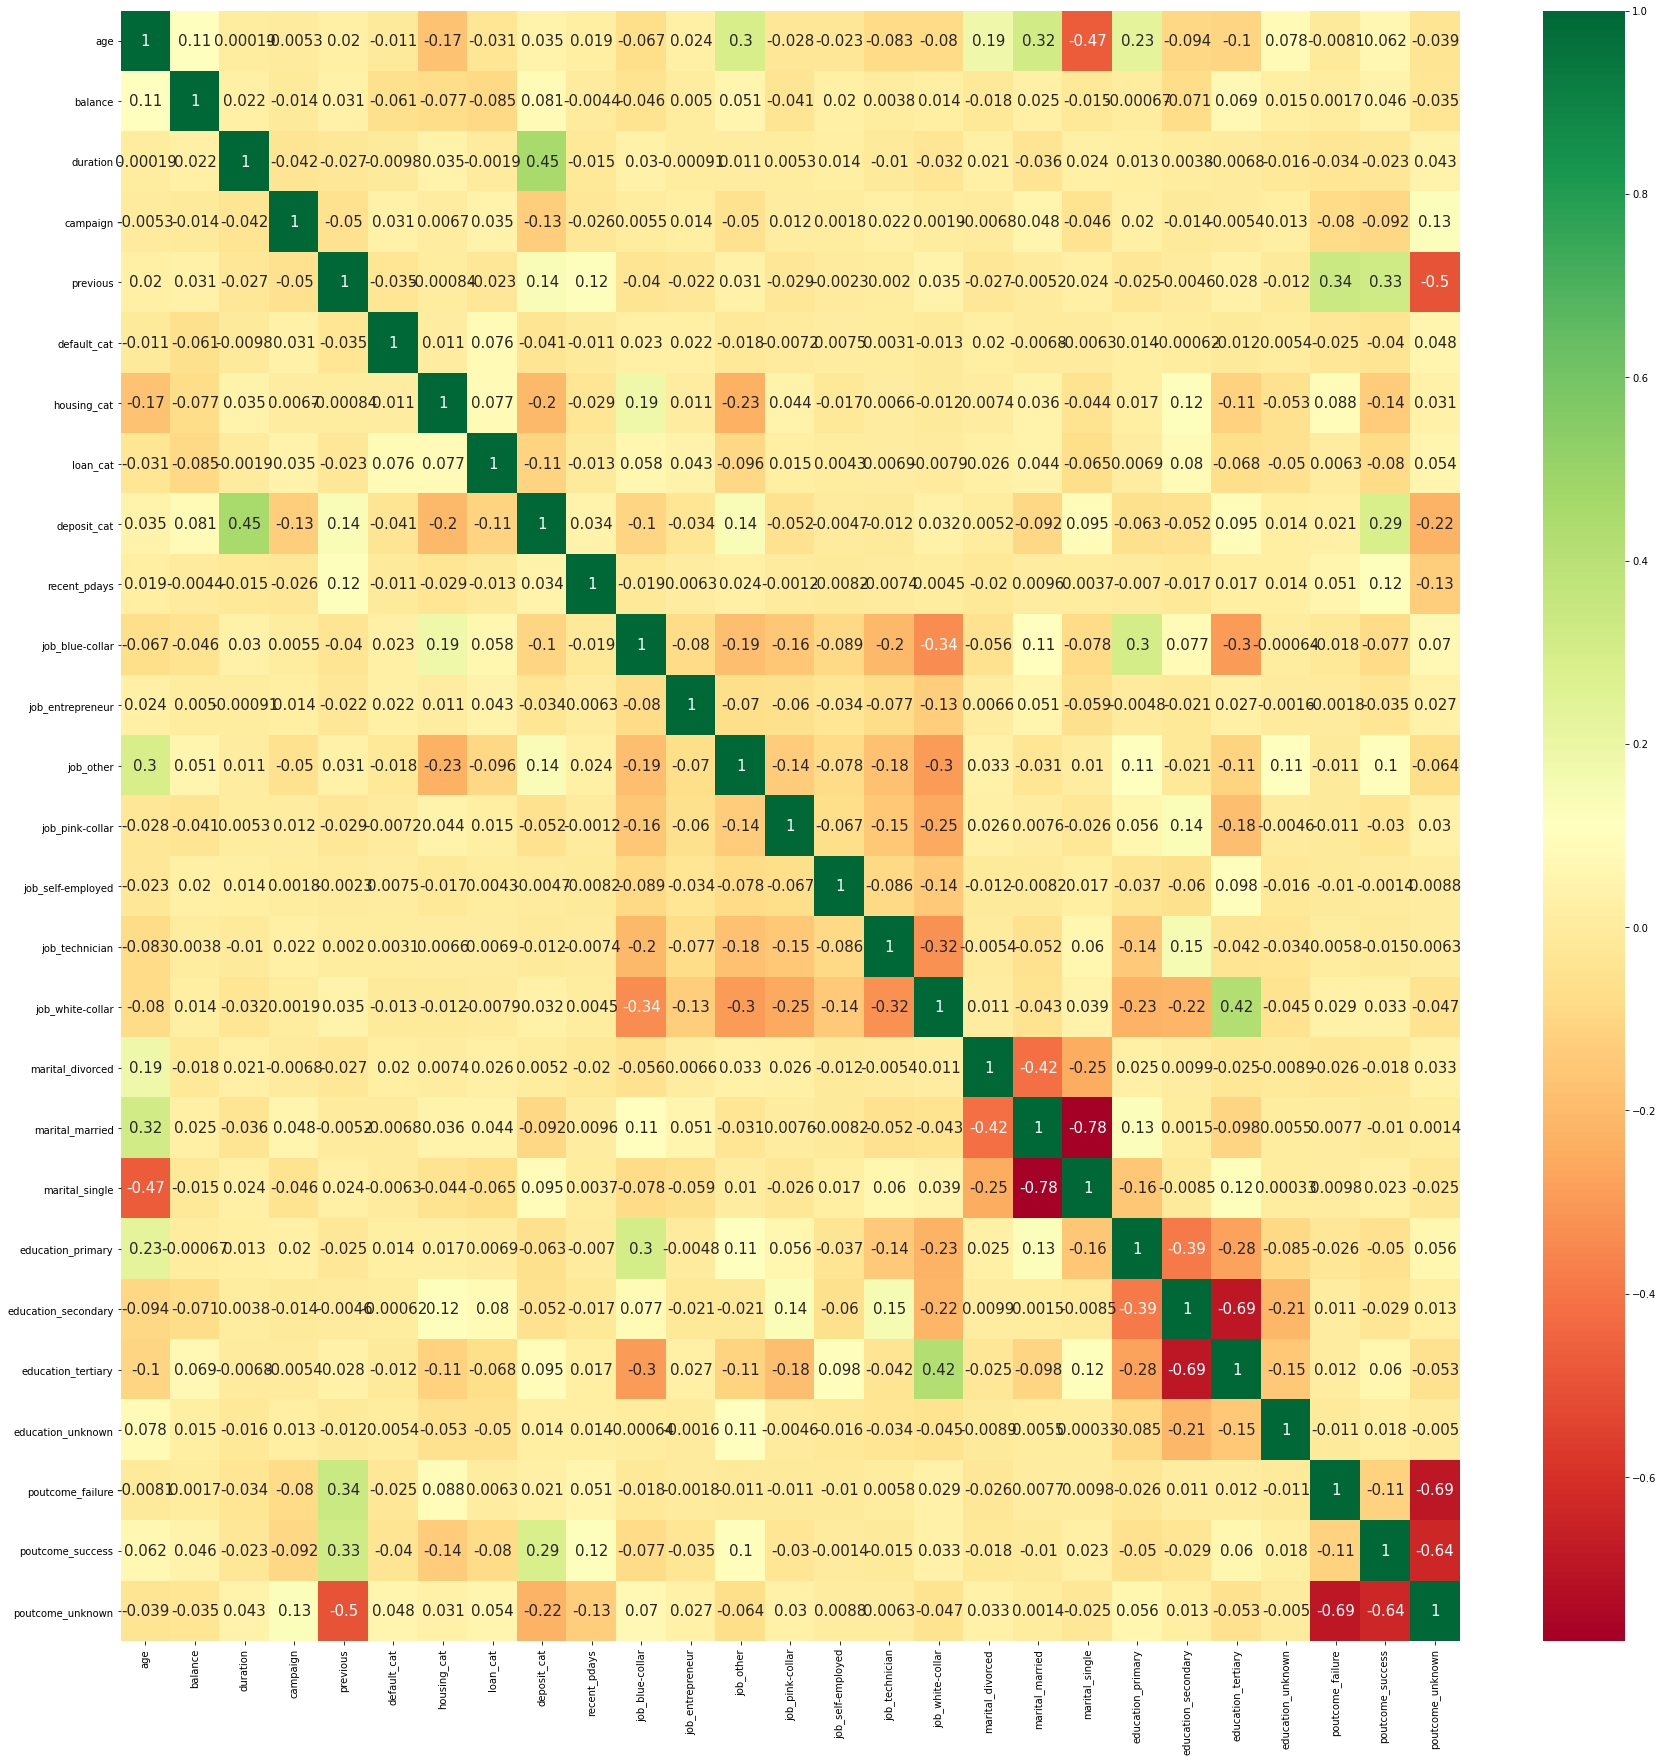

In [49]:
plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot=True, cmap="RdYlGn", annot_kws={"size":15})

In [50]:
# Extract the deposte_cat column (the dependent variable)
corr_deposite = pd.DataFrame(corr['deposit_cat'].drop('deposit_cat'))
corr_deposite.sort_values(by = 'deposit_cat', ascending = False)

,deposit_cat
duration,0.45
poutcome_success,0.29
job_other,0.14
previous,0.14
marital_single,0.09
education_tertiary,0.09
balance,0.08
age,0.03
recent_pdays,0.03
job_white-collar,0.03


# Model Building

In [52]:
# Train-Test split: 20% test data

from sklearn.model_selection import train_test_split
data_drop_deposite = bankcl.drop('deposit_cat', 1)
label = bankcl.deposit_cat
data_train, data_test, label_train, label_test = train_test_split(data_drop_deposite, label, test_size = 0.2, random_state = 50)

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, data_train, data_test, label_train, label_test, train=True):
    if train:
        pred = clf.predict(data_train)
        clf_report = pd.DataFrame(classification_report(label_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(data_test)
        clf_report = pd.DataFrame(classification_report(label_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label_test, pred)}\n")

# Decision Tree Classifier

In [54]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(data_train, label_train)

print_score(tree_clf, data_train, data_test, label_train, label_test, train=True)
print_score(tree_clf, data_train, data_test, label_train, label_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    1.00    1.00      1.00       1.00          1.00
recall       1.00    1.00      1.00       1.00          1.00
f1-score     1.00    1.00      1.00       1.00          1.00
support   4700.00 4229.00      1.00    8929.00       8929.00
_______________________________________________
Confusion Matrix: 
 [[4700    0]
 [   0 4229]]

Test Result:
Accuracy Score: 73.71%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    0.75    0.73      0.74       0.74          0.74
recall       0.75    0.72      0.74       0.74          0.74
f1-score     0.75    0.72      0.74       0.74          0.74
support   1173.00 1060.00      0.74    2233.00       2233.00
_______________________________________________
Confusion Matrix: 
 [[885 288]

## Decision Tree Classifier Using Hyperparameter tuning

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(data_train, label_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(data_train, label_train)
print_score(tree_clf, data_train, data_test, label_train, label_test, train=True)
print_score(tree_clf, data_train, data_test, label_train, label_test, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 920 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 2920 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done 5720 tasks      | elapsed:   54.2s
[Parallel(n_jobs=-1)]: Done 9320 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 12996 out of 12996 | elapsed:  2.1min finished


Best paramters: {'criterion': 'gini', 'max_depth': 16, 'min_samples_leaf': 18, 'min_samples_split': 2, 'splitter': 'random'})
Train Result:
Accuracy Score: 81.86%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    0.84    0.80      0.82       0.82          0.82
recall       0.81    0.82      0.82       0.82          0.82
f1-score     0.83    0.81      0.82       0.82          0.82
support   4700.00 4229.00      0.82    8929.00       8929.00
_______________________________________________
Confusion Matrix: 
 [[3829  871]
 [ 749 3480]]

Test Result:
Accuracy Score: 78.77%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    0.80    0.77      0.79       0.79          0.79
recall       0.79    0.78      0.79       0.79          0.79
f1-score     0.80    0.78      0.79       0.79          0.79
support   1173

## Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(data_train, label_train)

print_score(rf_clf, data_train, data_test, label_train, label_test, train=True)
print_score(rf_clf, data_train, data_test, label_train, label_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    1.00    1.00      1.00       1.00          1.00
recall       1.00    1.00      1.00       1.00          1.00
f1-score     1.00    1.00      1.00       1.00          1.00
support   4700.00 4229.00      1.00    8929.00       8929.00
_______________________________________________
Confusion Matrix: 
 [[4700    0]
 [   0 4229]]

Test Result:
Accuracy Score: 80.74%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    0.82    0.79      0.81       0.81          0.81
recall       0.81    0.80      0.81       0.81          0.81
f1-score     0.82    0.80      0.81       0.81          0.81
support   1173.00 1060.00      0.81    2233.00       2233.00
_______________________________________________
Confusion Matrix: 
 [[951 222]

## Random Forest hyperparameter tuning

### Randomized Search Cross Validation

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_clf, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(data_train, label_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(data_train, label_train)

print_score(rf_clf, data_train, data_test, label_train, label_test, train=True)
print_score(rf_clf, data_train, data_test, label_train, label_test, train=False)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 17.7min finished


Best paramters: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 70, 'bootstrap': True})
Train Result:
Accuracy Score: 87.93%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    0.90    0.86      0.88       0.88          0.88
recall       0.87    0.89      0.88       0.88          0.88
f1-score     0.88    0.88      0.88       0.88          0.88
support   4700.00 4229.00      0.88    8929.00       8929.00
_______________________________________________
Confusion Matrix: 
 [[4074  626]
 [ 452 3777]]

Test Result:
Accuracy Score: 81.59%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    0.83    0.80      0.82       0.82          0.82
recall       0.81    0.82      0.82       0.82          0.82
f1-score     0.82    0.81      0.82       0.82        

### Grid Search Cross Validation

In [59]:
n_estimators = [100, 500, 1000, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4, 10]
bootstrap = [True, False]

params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="f1", cv=3, verbose=2, n_jobs=-1)


rf_cv.fit(data_train, label_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(data_train, label_train)

print_score(rf_clf, data_train, data_test, label_train, label_test, train=True)
print_score(rf_clf, data_train, data_test, label_train, label_test, train=False)

Fitting 3 folds for each of 768 candidates, totalling 2304 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 21.0min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 30.5min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 40.2min
[Parallel(n_jobs=-1)]: Done 2304 out of 2304 | elapsed: 55.0min finished


Best parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 1500}
Train Result:
Accuracy Score: 86.22%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    0.89    0.84      0.86       0.86          0.86
recall       0.85    0.88      0.86       0.86          0.86
f1-score     0.87    0.86      0.86       0.86          0.86
support   4700.00 4229.00      0.86    8929.00       8929.00
_______________________________________________
Confusion Matrix: 
 [[3988  712]
 [ 518 3711]]

Test Result:
Accuracy Score: 81.46%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    0.84    0.79      0.81       0.81          0.82
recall       0.81    0.82      0.81       0.82          0.81
f1-score     0.82    0.81      0.81       0.81    